In [6]:
#Importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Openning the data in URL
volcano_url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv"
eruption_url= "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv"

In [8]:
#Turning the volcano data into Geodataframe
volcano= pd.read_csv(volcano_url)
points = volcano.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
volcano_data = gpd.GeoDataFrame(volcano, geometry=points)
#volcano_data.crs = {"init": "epsg:4326"}
volcano_data.head()


,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,geometry
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,3597,9594,117805,4071152,POINT (131.60000 34.50000)
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,0,7,294,9092,POINT (-67.61800 -23.29200)
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778,POINT (-90.87600 14.50100)
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,127863,127863,218469,2253483,POINT (34.62100 38.53700)
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,Dacite,,,,,0,70,4019,393303,POINT (-121.49000 46.20600)


In [9]:
#turning eruption data into Geodataframe
eruption = pd.read_csv(eruption_url)
points = eruption.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
eruption_data = gpd.GeoDataFrame(eruption, geometry=points)
eruption_data.crs = {"init": "epsg:4326"}
eruption_data.head()

c:\Users\James.Osolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,geometry
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737,POINT (124.73700 1.11200)
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269,POINT (-88.26900 13.43400)
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708,POINT (55.70800 -21.24400)
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324,POINT (-85.32400 10.83000)
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550,POINT (-91.55000 -0.37000)


In [10]:
#openning the data in pandas
volcano = pd.read_csv(volcano_url)
volcano.columns

Index(['volcano_number', 'volcano_name', 'primary_volcano_type',
       'last_eruption_year', 'country', 'region', 'subregion', 'latitude',
       'longitude', 'elevation', 'tectonic_settings', 'evidence_category',
       'major_rock_1', 'major_rock_2', 'major_rock_3', 'major_rock_4',
       'major_rock_5', 'minor_rock_1', 'minor_rock_2', 'minor_rock_3',
       'minor_rock_4', 'minor_rock_5', 'population_within_5_km',
       'population_within_10_km', 'population_within_30_km',
       'population_within_100_km'],
      dtype='object')

In [11]:
eruption = pd.read_csv(eruption_url)
eruption.columns

Index(['volcano_number', 'volcano_name', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'evidence_method_dating', 'end_year',
       'end_month', 'end_day', 'latitude', 'longitude'],
      dtype='object')

In [12]:
#Merging the two dataset
data = pd.merge(volcano,eruption, on=['volcano_number', 'volcano_name','latitude','longitude'])
data.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,Confirmed Eruption,Kasa-yama,NaN,-6850.0,0.0,0.0,Thermoluminescence,NaN,NaN,NaN
1,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,Confirmed Eruption,Pico Central-Yepocapa saddle,1.0,1972.0,11.0,12.0,Historical Observations,1972.0,12.0,16.0
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,Confirmed Eruption,Pico Central,2.0,1926.0,8.0,0.0,Historical Observations,1927.0,5.0,19.0
3,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,Confirmed Eruption,North slope of Pico Central,3.0,1924.0,12.0,18.0,Historical Observations,1925.0,6.0,7.0
4,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,Confirmed Eruption,NaN,NaN,1450.0,0.0,0.0,Anthropology,NaN,NaN,NaN


In [13]:
data.describe()

,volcano_number,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day
count,9559.000000,9559.000000,9559.000000,9559.000000,9.559000e+03,9.559000e+03,9.559000e+03,9.559000e+03,9559.000000,7160.000000,9558.000000,9388.000000,9385.000000,3694.000000,3691.000000,3688.000000
mean,297785.872058,17.253244,35.830301,2217.471074,3.692338e+04,5.578794e+04,4.302366e+05,3.632130e+06,15621.177738,1.985196,622.349550,3.425543,6.987001,1911.475095,6.232999,13.163232
std,47083.600232,30.936030,112.232832,1326.973598,2.607263e+05,2.693210e+05,8.494366e+05,6.598072e+06,3264.400545,1.143706,2455.974644,4.067385,9.657412,167.349809,3.701593,9.838150
min,210010.000000,-77.530000,-179.970000,-2500.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000
25%,263300.000000,-6.137000,-72.496000,1281.000000,6.000000e+00,7.000000e+01,1.718000e+03,6.399900e+04,12806.500000,1.000000,640.000000,0.000000,0.000000,1893.250000,3.000000,3.000000
50%,285040.000000,19.421000,55.708000,1974.000000,3.280000e+02,3.122000e+03,6.297400e+04,7.178200e+05,15644.000000,2.000000,1838.000000,1.000000,0.000000,1953.000000,6.000000,14.500000
75%,342110.000000,40.656000,139.231500,3008.000000,3.032000e+03,2.305900e+04,4.447370e+05,3.631492e+06,18302.500000,2.000000,1946.000000,7.000000,15.000000,1990.000000,9.000000,21.000000
max,390140.000000,71.082000,179.580000,6879.000000,5.783287e+06,5.783287e+06,6.735396e+06,4.064010e+07,22354.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000


In [14]:
data.isna().sum()

volcano_number                 0
volcano_name                   0
primary_volcano_type           0
last_eruption_year             0
country                        0
region                         0
subregion                      0
latitude                       0
longitude                      0
elevation                      0
tectonic_settings              0
evidence_category              0
major_rock_1                   0
major_rock_2                   0
major_rock_3                   0
major_rock_4                   0
major_rock_5                   0
minor_rock_1                   0
minor_rock_2                   0
minor_rock_3                   0
minor_rock_4                   0
minor_rock_5                   0
population_within_5_km         0
population_within_10_km        0
population_within_30_km        0
population_within_100_km       0
eruption_number                0
eruption_category              0
area_of_activity            5212
vei                         2399
start_year

1.Which category of volcanoes have the highest effects on population

In [15]:
filt = data.eruption_category == "Confirmed Eruption"
confirmed = data.loc[filt]
category = confirmed.groupby("primary_volcano_type")["population_within_100_km"].max()
category.sort_values(ascending=False, inplace=True)

top = category.head(11)
top



primary_volcano_type
Stratovolcano(es)      40640105
Stratovolcano          38154252
Complex                30282197
Volcanic field         28030794
Caldera                24814047
Pyroclastic cone(s)    17928355
Lava dome(s)           10276159
Shield                  9303980
Caldera(s)              7958409
Maar(s)                 7945412
Pyroclastic cone        5565084
Name: population_within_100_km, dtype: int64

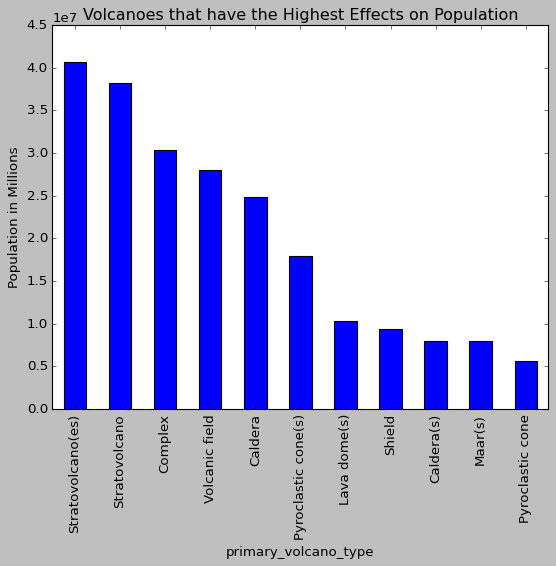

In [16]:
plt.style.use("classic")
top.plot.bar()
plt.title("Volcanoes that have the Highest Effects on Population")
plt.ylabel("Population in Millions")
plt.show()

2. Create a visualization of the tectonic plates around the globe.

In [17]:
plates = data.groupby(["tectonic_settings", "primary_volcano_type", "latitude", "longitude"]).size().reset_index(name='count')
plates.columns

Index(['tectonic_settings', 'primary_volcano_type', 'latitude', 'longitude',
       'count'],
      dtype='object')

In [18]:
geo = gpd.GeoDataFrame(plates, geometry=gpd.points_from_xy(plates["longitude"],plates["latitude"]))
geo

,tectonic_settings,primary_volcano_type,latitude,longitude,count,geometry
0,Intraplate / Continental crust (>25 km),Caldera,-63.001,-60.652,30,POINT (-60.65200 -63.00100)
1,Intraplate / Continental crust (>25 km),Caldera,38.537,34.621,5,POINT (34.62100 38.53700)
2,Intraplate / Continental crust (>25 km),Pyroclastic cone(s),-65.030,-60.050,2,POINT (-60.05000 -65.03000)
3,Intraplate / Continental crust (>25 km),Pyroclastic cone(s),-19.033,46.700,2,POINT (46.70000 -19.03300)
4,Intraplate / Continental crust (>25 km),Pyroclastic cone(s),15.320,26.470,6,POINT (26.47000 15.32000)
...,...,...,...,...,...,...
684,Subduction zone / Oceanic crust (< 15 km),Submarine,-14.215,-169.058,3,POINT (-169.05800 -14.21500)
685,Subduction zone / Oceanic crust (< 15 km),Submarine,12.300,-61.640,15,POINT (-61.64000 12.30000)
686,Subduction zone / Oceanic crust (< 15 km),Submarine,31.440,140.051,24,POINT (140.05100 31.44000)
687,Subduction zone / Oceanic crust (< 15 km),Submarine,31.888,139.918,23,POINT (139.91800 31.88800)


<Axes: >

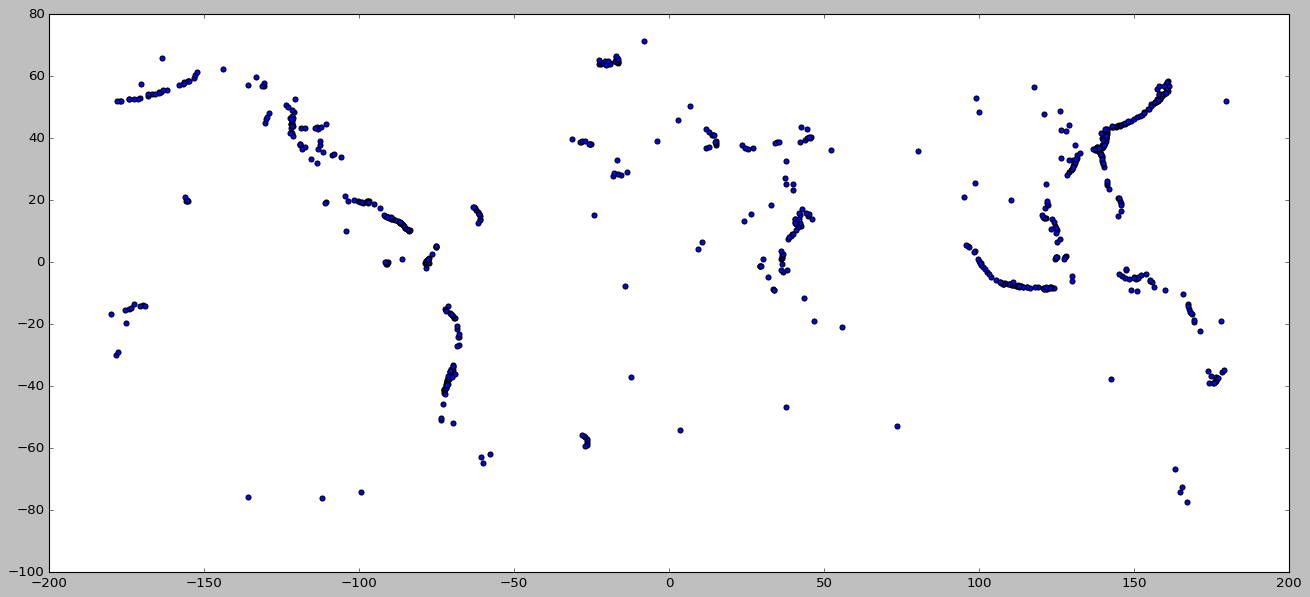

In [19]:
geo.plot(figsize=(20,10))

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


(-200.0, 200.0, -100.0, 100.0)

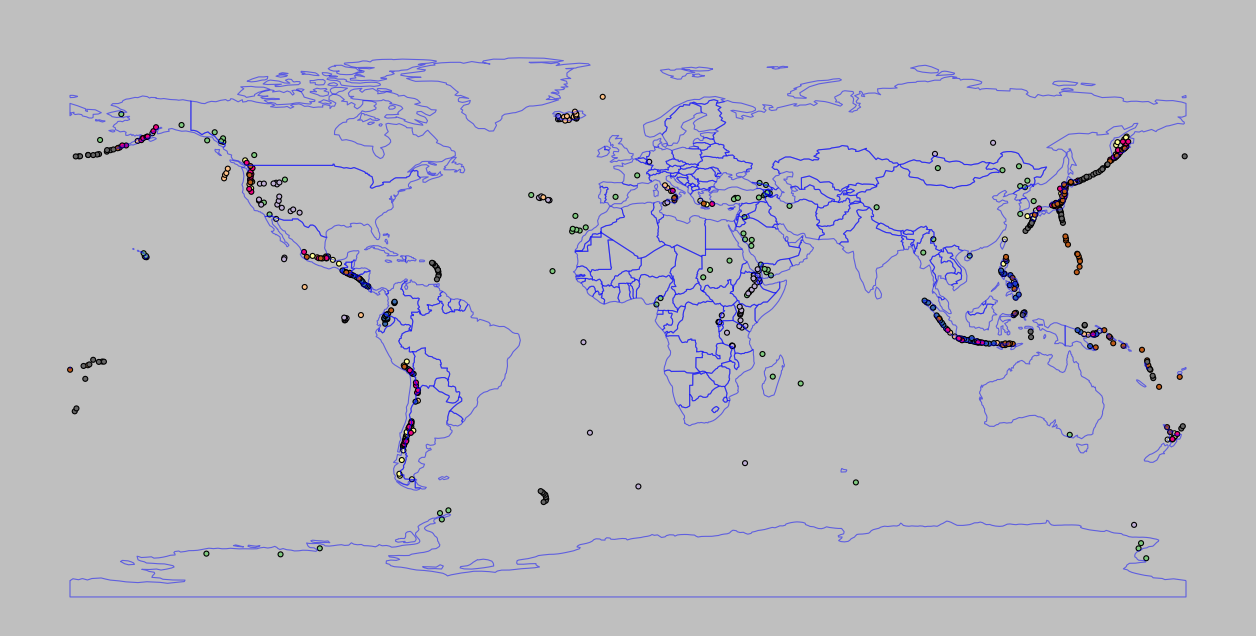

In [21]:
# Overlapping with the available data
fig, ax = plt.subplots(figsize= (20,10))
geo.plot(cmap="Accent",ax=ax)
world.geometry.boundary.plot(color="blue", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")

In [22]:
filt = world.continent == "Africa"
Africa = world.loc[filt]
Africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


3. Visualize with size difference what is the distribution across the globe.

In [23]:
size = data.groupby("region")["eruption_number"].count()
size.sort_values(ascending=False, inplace=True)
size.head

<bound method NDFrame.head of region
Japan, Taiwan, Marianas           1713
Indonesia                         1297
South America                     1014
México and Central America         818
Kamchatka and Mainland Asia        724
Mediterranean and Western Asia     521
Iceland and Arctic Ocean           509
Alaska                             430
New Zealand to Fiji                403
Melanesia and Australia            363
Hawaii and Pacific Ocean           312
Canada and Western USA             276
Middle East and Indian Ocean       261
Africa and Red Sea                 215
Atlantic Ocean                     167
Kuril Islands                      157
West Indies                        143
Philippines and SE Asia            139
Antarctica                          97
Name: eruption_number, dtype: int64>

In [24]:
size = data.groupby(["region","eruption_number","latitude", "longitude"]).size().reset_index(name='count')
size 

,region,eruption_number,latitude,longitude,count
0,Africa and Red Sea,13828,-2.764,35.914,1
1,Africa and Red Sea,13829,-2.680,37.880,1
2,Africa and Red Sea,13830,-2.680,37.880,1
3,Africa and Red Sea,13919,15.550,41.830,1
4,Africa and Red Sea,13920,15.550,41.830,1
...,...,...,...,...,...
9552,West Indies,20970,16.720,-62.180,1
9553,West Indies,20971,16.720,-62.180,1
9554,West Indies,20972,16.720,-62.180,1
9555,West Indies,21090,12.300,-61.640,1


In [25]:
geo1 = gpd.GeoDataFrame(size, geometry=gpd.points_from_xy(size["longitude"],size["latitude"]))
geo1

,region,eruption_number,latitude,longitude,count,geometry
0,Africa and Red Sea,13828,-2.764,35.914,1,POINT (35.91400 -2.76400)
1,Africa and Red Sea,13829,-2.680,37.880,1,POINT (37.88000 -2.68000)
2,Africa and Red Sea,13830,-2.680,37.880,1,POINT (37.88000 -2.68000)
3,Africa and Red Sea,13919,15.550,41.830,1,POINT (41.83000 15.55000)
4,Africa and Red Sea,13920,15.550,41.830,1,POINT (41.83000 15.55000)
...,...,...,...,...,...,...
9552,West Indies,20970,16.720,-62.180,1,POINT (-62.18000 16.72000)
9553,West Indies,20971,16.720,-62.180,1,POINT (-62.18000 16.72000)
9554,West Indies,20972,16.720,-62.180,1,POINT (-62.18000 16.72000)
9555,West Indies,21090,12.300,-61.640,1,POINT (-61.64000 12.30000)


In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


(-200.0, 200.0, -100.0, 100.0)

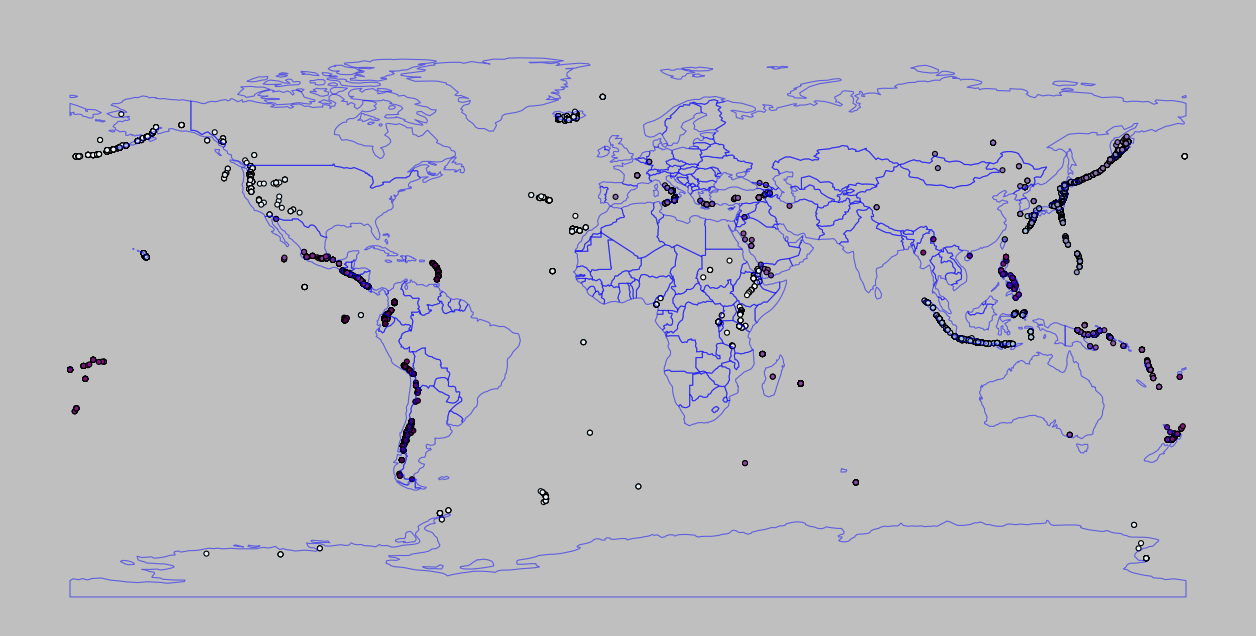

In [27]:
fig, ax = plt.subplots(figsize= (20,10))
geo1.plot(cmap="BuPu",ax=ax)
world.geometry.boundary.plot(color="blue", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")

4. Locations of most active volcanoes since 1800.

In [28]:
active = confirmed.groupby("country")["eruption_category"].count()
active.sort_values(ascending=False, inplace=True)
active

country
Japan                1423
Indonesia            1182
United States         883
Russia                791
Iceland               470
                     ... 
Ethiopia-Djibouti       1
Colombia-Ecuador        1
Burma (Myanmar)         1
Iran                    1
Saint Lucia             1
Name: eruption_category, Length: 75, dtype: int64

In [29]:
#Removing negatives
filt = data.eruption_category == "Confirmed Eruption"
filt2 = data.start_year >= 1800
confirm = data.loc[filt]

confirmed1 = confirm.loc[filt2]

In [30]:
locations = confirmed1.groupby(["country","start_year","eruption_category","latitude", "longitude"]).size().reset_index(name='count')
locations

,country,start_year,eruption_category,latitude,longitude,count
0,Antarctica,1800.0,Confirmed Eruption,-63.001,-60.652,1
1,Antarctica,1827.0,Confirmed Eruption,-63.001,-60.652,1
2,Antarctica,1839.0,Confirmed Eruption,-66.780,163.250,1
3,Antarctica,1841.0,Confirmed Eruption,-77.530,167.170,1
4,Antarctica,1842.0,Confirmed Eruption,-63.001,-60.652,1
...,...,...,...,...,...,...
4167,Yemen,1883.0,Confirmed Eruption,15.550,41.830,1
4168,Yemen,1937.0,Confirmed Eruption,14.570,44.670,1
4169,Yemen,2007.0,Confirmed Eruption,15.550,41.830,1
4170,Yemen,2011.0,Confirmed Eruption,15.050,42.180,1


In [31]:
geo2 = gpd.GeoDataFrame(locations, geometry=gpd.points_from_xy(locations["longitude"],locations["latitude"]))
geo2

,country,start_year,eruption_category,latitude,longitude,count,geometry
0,Antarctica,1800.0,Confirmed Eruption,-63.001,-60.652,1,POINT (-60.65200 -63.00100)
1,Antarctica,1827.0,Confirmed Eruption,-63.001,-60.652,1,POINT (-60.65200 -63.00100)
2,Antarctica,1839.0,Confirmed Eruption,-66.780,163.250,1,POINT (163.25000 -66.78000)
3,Antarctica,1841.0,Confirmed Eruption,-77.530,167.170,1,POINT (167.17000 -77.53000)
4,Antarctica,1842.0,Confirmed Eruption,-63.001,-60.652,1,POINT (-60.65200 -63.00100)
...,...,...,...,...,...,...,...
4167,Yemen,1883.0,Confirmed Eruption,15.550,41.830,1,POINT (41.83000 15.55000)
4168,Yemen,1937.0,Confirmed Eruption,14.570,44.670,1,POINT (44.67000 14.57000)
4169,Yemen,2007.0,Confirmed Eruption,15.550,41.830,1,POINT (41.83000 15.55000)
4170,Yemen,2011.0,Confirmed Eruption,15.050,42.180,1,POINT (42.18000 15.05000)


(-200.0, 200.0, -100.0, 100.0)

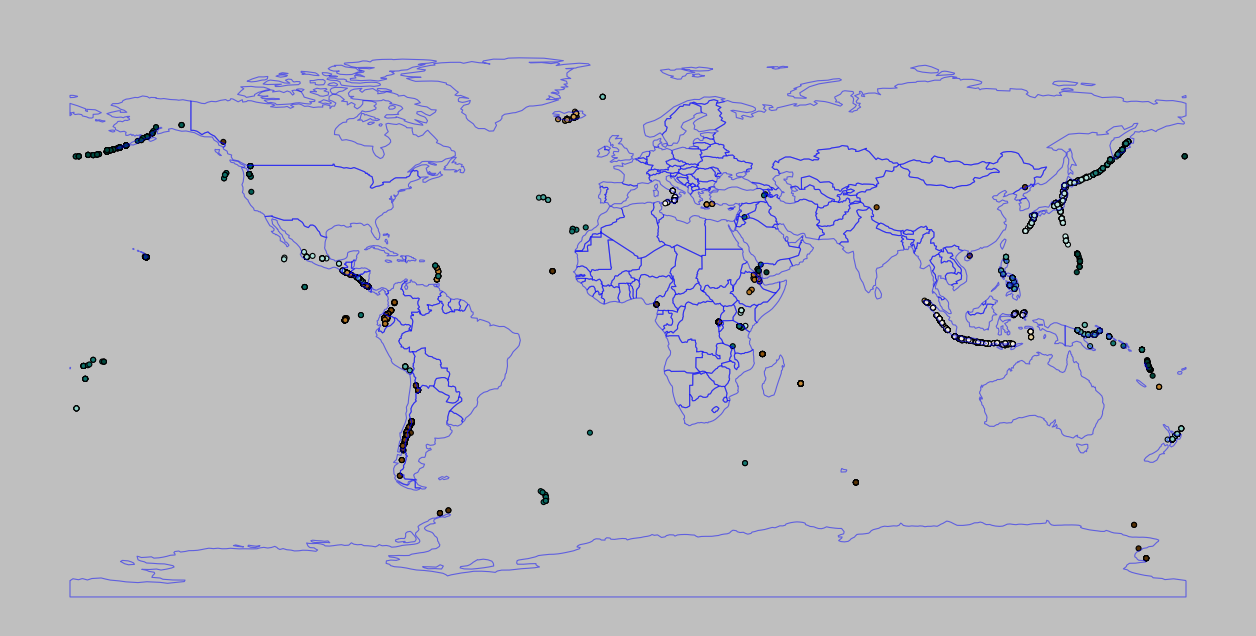

In [32]:
fig, ax = plt.subplots(figsize= (20,10))
geo2.plot(cmap="BrBG",ax=ax)
world.geometry.boundary.plot(color="blue", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")


5. Choose a year of your interest and plot the frequency of eruptions per month, worldwide.

In [33]:
year_to_analyze = 2005
data_for_year = data[data["start_year"] == year_to_analyze]
frequency = data_for_year["eruption_category"].value_counts()
frequency.sort_values(ascending=False, inplace=True)
frequency

Confirmed Eruption    33
Uncertain Eruption     4
Name: eruption_category, dtype: int64

In [34]:
data.columns

Index(['volcano_number', 'volcano_name', 'primary_volcano_type',
       'last_eruption_year', 'country', 'region', 'subregion', 'latitude',
       'longitude', 'elevation', 'tectonic_settings', 'evidence_category',
       'major_rock_1', 'major_rock_2', 'major_rock_3', 'major_rock_4',
       'major_rock_5', 'minor_rock_1', 'minor_rock_2', 'minor_rock_3',
       'minor_rock_4', 'minor_rock_5', 'population_within_5_km',
       'population_within_10_km', 'population_within_30_km',
       'population_within_100_km', 'eruption_number', 'eruption_category',
       'area_of_activity', 'vei', 'start_year', 'start_month', 'start_day',
       'evidence_method_dating', 'end_year', 'end_month', 'end_day'],
      dtype='object')

In [35]:
year_to_analyze = 2000
data_for_year = data[(data["start_year"] == year_to_analyze) | (data["end_year"] == year_to_analyze)]
frequency = data_for_year.groupby(["eruption_category","latitude","longitude","country","start_month", "end_month"]).count().sort_index()
frequency

volcano_number  \
eruption_category  latitude longitude country          start_month end_month                   
Confirmed Eruption -57.800  -26.483   United Kingdom   5.0         11.0                    1   
                   -53.106   73.513   Australia        3.0         2.0                     1   
                   -37.856  -71.183   Chile-Argentina  7.0         10.0                    1   
                   -37.520   177.180  New Zealand      3.0         9.0                     1   
                   -23.370  -67.730   Chile            7.0         1.0                     1   
                   -21.244   55.708   France           2.0         3.0                     1   
                                                       6.0         11.0                    1   
                   -15.787  -71.857   Peru             4.0         10.0                    1   
                   -10.386   165.804  Solomon Islands  2.0         5.0                     1   
                   -8.242    115.375  Indonesia        3.0         6.0                     1   
                   -8.119    114.056  Indonesia        7.0         7.0                     1   
                   -7.942    112.950  Indonesia        11.0        1.0                     1   
                   -6.137    155.196  Papua New Guinea 2.0         4.0                     1   
                   -6.102    105.423  Indonesia        5.0         10.0                    1   
                   -5.525    148.420  Papua New Guinea 2.0         10.0                    1   
                   -4.080    145.037  Papua New Guinea 6.0         6.0                     1   
                   -3.522    102.615  Indonesia        8.0         8.0                     1   
                   -1.408    29.200   DR Congo         1.0         2.0                     1   
                   -0.380    100.474  Indonesia        3.0         4.0                     1   
                    1.112    124.737  Indonesia        5.0         9.0                     1   
                    1.220   -77.370   Colombia         3.0         5.0                     1   
                    1.358    124.792  Indonesia        5.0         8.0                     1   
                    4.203    9.170    Cameroon         5.0         9.0                     1   
                    4.903    96.289   Indonesia        12.0        12.0                    1   
                    11.985  -86.165   Nicaragua        11.0        3.0                     1   
                    12.606  -86.840   Nicaragua        5.0         9.0                     1   
                    12.702  -87.004   Nicaragua        5.0         6.0                     1   
                    14.382  -90.601   Guatemala        1.0         3.0                     1   
                                                       8.0         7.0                     1   
                    14.473  -90.880   Guatemala        5.0         12.0                    1   
                    29.638   129.714  Japan            2.0         2.0                     1   
                                                       12.0        7.0                     1   
                    30.793   130.305  Japan            1.0         3.0                     1   
                                                       10.0        12.0                    1   
                    34.094   139.526  Japan            6.0         9.0                     1   
                    38.730  -27.320   Portugal         11.0        3.0                     1   
                    42.063   140.677  Japan            9.0         11.0                    1   
                    42.544   140.839  Japan            3.0         9.0                     1   
                    52.449   158.196  Russia           3.0         3.0                     1   
                                                       6.0         6.0                     1   
                    54.049   159.443  Russia  

In [37]:
locations = frequency.groupby(["eruption_category","latitude","longitude","country","start_month", "end_month"]).size().reset_index(name='count')
locations

,eruption_category,latitude,longitude,country,start_month,end_month,count
0,Confirmed Eruption,-57.800,-26.483,United Kingdom,5.0,11.0,1
1,Confirmed Eruption,-53.106,73.513,Australia,3.0,2.0,1
2,Confirmed Eruption,-37.856,-71.183,Chile-Argentina,7.0,10.0,1
3,Confirmed Eruption,-37.520,177.180,New Zealand,3.0,9.0,1
4,Confirmed Eruption,-23.370,-67.730,Chile,7.0,1.0,1
5,Confirmed Eruption,-21.244,55.708,France,2.0,3.0,1
6,Confirmed Eruption,-21.244,55.708,France,6.0,11.0,1
7,Confirmed Eruption,-15.787,-71.857,Peru,4.0,10.0,1
8,Confirmed Eruption,-10.386,165.804,Solomon Islands,2.0,5.0,1
9,Confirmed Eruption,-8.242,115.375,Indonesia,3.0,6.0,1


In [38]:
geo3 = gpd.GeoDataFrame(locations, geometry=gpd.points_from_xy(locations["longitude"],locations["latitude"]))
geo3

,eruption_category,latitude,longitude,country,start_month,end_month,count,geometry
0,Confirmed Eruption,-57.800,-26.483,United Kingdom,5.0,11.0,1,POINT (-26.48300 -57.80000)
1,Confirmed Eruption,-53.106,73.513,Australia,3.0,2.0,1,POINT (73.51300 -53.10600)
2,Confirmed Eruption,-37.856,-71.183,Chile-Argentina,7.0,10.0,1,POINT (-71.18300 -37.85600)
3,Confirmed Eruption,-37.520,177.180,New Zealand,3.0,9.0,1,POINT (177.18000 -37.52000)
4,Confirmed Eruption,-23.370,-67.730,Chile,7.0,1.0,1,POINT (-67.73000 -23.37000)
5,Confirmed Eruption,-21.244,55.708,France,2.0,3.0,1,POINT (55.70800 -21.24400)
6,Confirmed Eruption,-21.244,55.708,France,6.0,11.0,1,POINT (55.70800 -21.24400)
7,Confirmed Eruption,-15.787,-71.857,Peru,4.0,10.0,1,POINT (-71.85700 -15.78700)
8,Confirmed Eruption,-10.386,165.804,Solomon Islands,2.0,5.0,1,POINT (165.80400 -10.38600)
9,Confirmed Eruption,-8.242,115.375,Indonesia,3.0,6.0,1,POINT (115.37500 -8.24200)


(-200.0, 200.0, -100.0, 100.0)

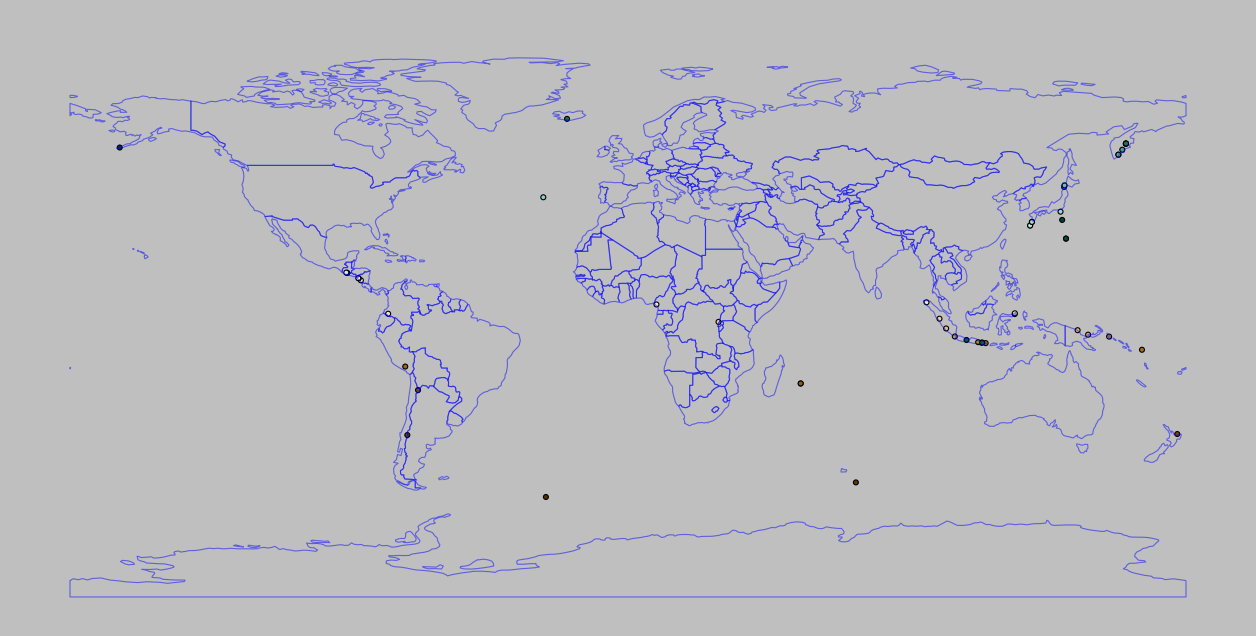

In [39]:
fig, ax = plt.subplots(figsize= (20,10))
geo3.plot(cmap="BrBG",ax=ax)
world.geometry.boundary.plot(color="blue", edgecolor="k", alpha=0.5, ax=ax)
ax.axis("off")